In [111]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [112]:
train_df = pd.read_csv('./datasets/bike-sharing-demand/train.csv')
test_df = pd.read_csv('./datasets/bike-sharing-demand/test.csv')

In [113]:
train_df['datetime'] = train_df['datetime'].apply(pd.to_datetime)
test_df['datetime'] = test_df['datetime'].apply(pd.to_datetime)

In [114]:
train_df['year'] = train_df['datetime'].apply(lambda x : x.year)
train_df['month'] = train_df['datetime'].apply(lambda x : x.month)
train_df['day'] = train_df['datetime'].apply(lambda x : x.day)
train_df['hour'] = train_df['datetime'].apply(lambda x : x.hour)

In [115]:
test_df['year'] = test_df['datetime'].apply(lambda x : x.year)
test_df['month'] = test_df['datetime'].apply(lambda x : x.month)
test_df['day'] = test_df['datetime'].apply(lambda x : x.day)
test_df['hour'] = test_df['datetime'].apply(lambda x : x.hour)

In [116]:
train_df.drop(labels=['casual', 'registered', 'datetime'], axis=1, inplace=True)
test_df.drop(labels=['datetime'], axis=1, inplace=True)

In [120]:
from sklearn.model_selection import train_test_split
X = train_df.drop('count', axis=1)
y = train_df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['temp', 'atemp', 'humidity', 'windspeed']] = scaler.fit_transform(X_train[['temp', 'atemp', 'humidity', 'windspeed']])
X_test[['temp', 'atemp', 'humidity', 'windspeed']] = scaler.fit_transform(X_test[['temp', 'atemp', 'humidity', 'windspeed']])

In [123]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
els = ElasticNet(random_state=42)

models = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']

for model in models:
	if model == "LinearRegression":
		estimator = lr
	elif model =='Ridge':
		estimator = ridge
	elif model =='Lasso':
		estimator = lasso
	else :
		estimator = els
	result = cross_val_score(estimator, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
	avg_rmse = np.mean(np.sqrt(-1 * result))
	print(f'{model}의 rmse의 평균 : {avg_rmse}')
	estimator.fit(X_train, y_train)
	pred = estimator.predict(X_test)

	mse = mean_squared_error(y_test, pred)
	mae = mean_absolute_error(y_test, pred)
	rmse = np.sqrt(mse)
	r2score = r2_score(y_test, pred)

	print(f'{model}의 mse : {mse}, rmse : {rmse}, mae : {mae}, r2score : {r2score}')
	print("===============================================================")

LinearRegression의 rmse의 평균 : 142.14899663784644
LinearRegression의 mse : 19857.80396425714, rmse : 140.9177205473362, mae : 105.57092595681317, r2score : 0.38851790711842227
Ridge의 rmse의 평균 : 142.1486480175425
Ridge의 mse : 19857.938315613814, rmse : 140.91819724795593, mae : 105.56923764957016, r2score : 0.38851377003212073
Lasso의 rmse의 평균 : 142.18283236316773
Lasso의 mse : 19871.839886374113, rmse : 140.96751358513106, mae : 105.19860026822546, r2score : 0.38808569844887053
ElasticNet의 rmse의 평균 : 145.68473804489395
ElasticNet의 mse : 20996.342603765763, rmse : 144.90114769650987, mae : 106.75380920061716, r2score : 0.3534588446276057


<Axes: >

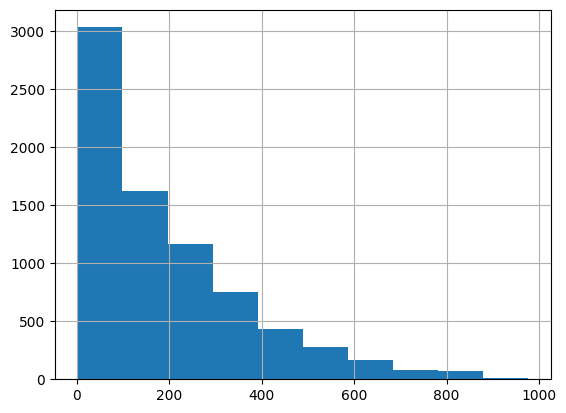

In [124]:
y_train.hist()

In [128]:
loged_scaled_y_train = np.log1p(y_train)
loged_scaled_y_test = np.log1p(y_test)

<Axes: >

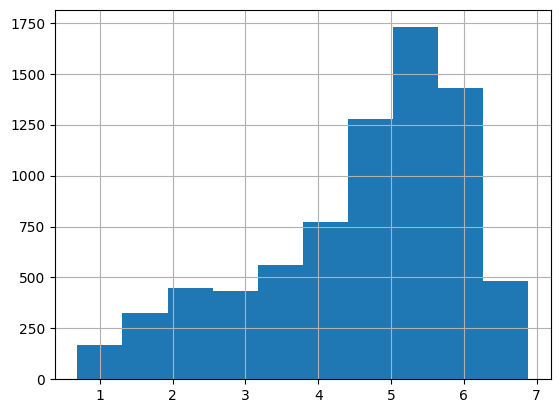

In [126]:
loged_scaled_y_train.hist()

In [129]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
els = ElasticNet(random_state=42)

models = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']

for model in models:
	if model == "LinearRegression":
		estimator = lr
	elif model =='Ridge':
		estimator = ridge
	elif model =='Lasso':
		estimator = lasso
	else :
		estimator = els
	result = cross_val_score(estimator, X_train, loged_scaled_y_train, cv=5, scoring="neg_mean_squared_error")
	avg_rmse = np.mean(np.sqrt(-1 * result))
	print(f'{model}의 rmse의 평균 : {avg_rmse}')
	estimator.fit(X_train, y_train)
	pred = estimator.predict(X_test)

	mse = mean_squared_error(loged_scaled_y_test, pred)
	mae = mean_absolute_error(loged_scaled_y_test, pred)
	rmse = np.sqrt(mse)
	r2score = r2_score(loged_scaled_y_test, pred)

	print(f'{model}의 mse : {mse}, rmse : {rmse}, mae : {mae}, r2score : {r2score}')
	print("===============================================================")

LinearRegression의 rmse의 평균 : 1.018359168050384
LinearRegression의 mse : 47815.97295323071, rmse : 218.668637333365, mae : 190.79633826798624, r2score : -23654.45784463637
Ridge의 rmse의 평균 : 1.0183561652659292
Ridge의 mse : 47813.06936679608, rmse : 218.66199799415554, mae : 190.7934407972627, r2score : -23653.021386016782
Lasso의 rmse의 평균 : 1.1732102172902292
Lasso의 mse : 47427.80596800432, rmse : 217.77925972875454, mae : 190.45035596071418, r2score : -23462.424363174356
ElasticNet의 rmse의 평균 : 1.1506961989049262
ElasticNet의 mse : 43680.35593406344, rmse : 208.99845916672075, mae : 187.32269359335123, r2score : -21608.49060782702
